**Diplomado en Inteligencia Artificial y Aprendizaje Profundo**

# Subclassing-Modelo de Regresión multi-logística 

##  Autores

1. Alvaro Mauricio Montenegro Díaz, ammontenegrod@unal.edu.co
2. Daniel Mauricio Montenegro Reyes, dextronomo@gmail.com 
3. Oleg Jarma, ojarmam@unal.edu.co
4. Maria del Pilar Montenegro, pmontenegro88@gmail.com

## Contenido

* [Introducción](#Introducción)
* [Importa módulos](#Importa-módulos)
* [Funciones de activación](#Funciones-de-activación)
* [El conjunto de datos Iris](#El-conjunto-de-datos-Iris)
* [Lectura de datos](#Lectura-de-datos)
* [Preprocesamiento](#Preprocesamiento)
* [Crea el modelo usando la API funcional](#Crea-el-modelo-usando-la-API-funcional)
* [Compila](#Compila)
* [Entrena](#Entrena)
* [Evaluación del modelo](#Evaluación-del-modelo)
* [Predicciones](#Predicciones)
* [Matriz de confusión](#Matriz-de-confusión)



## Introducción

Esta lección está dedicada a presentar la programación orientada a objetos aplicada a Keras, conocida genéricamente coo subclassing.

El tema es recomdado para  usuarios con conocimientos en programacón y keras en nuestro caso.

Hermos el  modelo  de clasificación con múltiples categorias, utiilzado en la introducción de la API funcional. El ejemplo es de nueo Iris, con el propósito de comparar los ods estilos de programación.


## Importa módulos

In [ ]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
#
from tensorflow.keras.models import Model
#
from tensorflow.keras.layers import Dense, Input, Activation
#
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
#
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
#
print(tf.__version__)

2.1.0


## El conjunto de datos Iris


Este conjunto de datos fue introducido por sir [Ronald Fisher]()

## Lectura de datos

In [2]:
# nombres de las columnas de los datos
col_names = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
target_dimensions = ['Setosa', 'Versicolor', 'Virginica']

# lee los datos
training_data_path = tf.keras.utils.get_file("iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_data_path = tf.keras.utils.get_file("iris_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

training = pd.read_csv(training_data_path, names=col_names, header=0)
test = pd.read_csv(test_data_path, names=col_names, header=0)

## Pre-procesamiento

La variable objetivo (target) tiene tres categorías. Usaremos la codificación one-hot.

### Codificación one-hot

In [3]:
y_train= pd.DataFrame(to_categorical(training.Species))
y_train.columns = target_dimensions

y_test = pd.DataFrame(to_categorical(test.Species))
y_test.columns = target_dimensions

### Elimina columna Species 

In [4]:
training.drop(['Species'], axis=1, inplace=True)
#test.drop(['Species'], axis=1, inplace=True)
y_test_species = test.pop('Species') # extrae la columna y la coloca en y_test_species
#
#Si necesita subir al dataframe la recodificación use estas líneas
#training = training.join(labels_training )
#test = test.join(labels_test )

### Normaliza los features

#### StandardScaler

In [5]:
# crea el objeto StandardScaler
scaler = StandardScaler()

# Ajusta los parámetros del scaler
scaler.fit(training)
print (scaler.mean_)

# escala training y test
x_train = scaler.transform(training)
x_test = scaler.transform(test)

# labels ( no requieren escalación)


[5.845      3.065      3.73916667 1.19666667]


## Crea el modelo usando subclassing

 Vamos a derivar una clase de la clase Model

In [6]:
class CustomModel(Model):
    
    def __init__(self, **kwargs):
        super(CustomModel, self).__init__(**kwargs)
        self.dense1 = Dense(5, activation='relu', )
        self.dense2 = Dense(10, activation='relu')
        self.dense3 = Dense(3, activation='softmax')
        
    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        return self.dense3(x)
    


## Crea una instancia de CustomModel

In [7]:
model_iris = CustomModel(name='my_custom_model')

In [ ]:
## Compila

In [8]:
model_iris.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Entrena

In [11]:

history = model_iris.fit(x_train, y_train.values,
                    batch_size= 64,
                    epochs= 30,
                    validation_split=0.2)

Train on 96 samples, validate on 24 samples
Epoch 1/30
96/96 [==============================] - 1s 11ms/sample - loss: 0.9798 - accuracy: 0.3229 - val_loss: 0.8623 - val_accuracy: 0.5833
Epoch 2/30
96/96 [==============================] - 0s 271us/sample - loss: 0.9531 - accuracy: 0.3958 - val_loss: 0.8450 - val_accuracy: 0.6250
Epoch 3/30
96/96 [==============================] - 0s 259us/sample - loss: 0.9355 - accuracy: 0.4688 - val_loss: 0.8324 - val_accuracy: 0.6667
Epoch 4/30
96/96 [==============================] - 0s 307us/sample - loss: 0.9198 - accuracy: 0.5521 - val_loss: 0.8203 - val_accuracy: 0.8750
Epoch 5/30
96/96 [==============================] - 0s 247us/sample - loss: 0.9067 - accuracy: 0.6771 - val_loss: 0.8102 - val_accuracy: 0.8750
Epoch 6/30
96/96 [==============================] - 0s 300us/sample - loss: 0.8946 - accuracy: 0.7188 - val_loss: 0.7992 - val_accuracy: 0.9167
Epoch 7/30
96/96 [==============================] - 0s 303us/sample - loss: 0.8828 - accuracy

Model: "my_custom_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  25        
_________________________________________________________________
dense_1 (Dense)              multiple                  60        
_________________________________________________________________
dense_2 (Dense)              multiple                  33        
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________


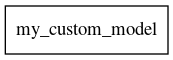

In [12]:
model_iris.summary()
#plot_model(model_iris, to_file='../Imagenes/iris_model.png', 
#           show_shapes=True)

## Evaluación del modelo

In [13]:

def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Entrenamiento y validación '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

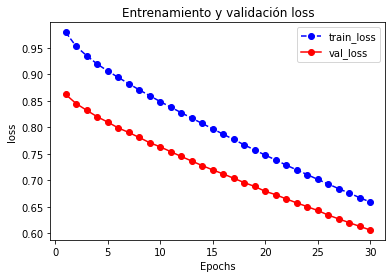

In [14]:
plot_metric(history, 'loss')

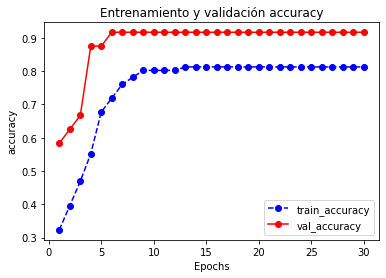

In [15]:
plot_metric(history, 'accuracy')

In [16]:
model_iris.evaluate(x = x_test,y = y_test.values)

30/30 [==============================] - 0s 165us/sample - loss: 0.7790 - accuracy: 0.7000


[0.7789719104766846, 0.7]

## Predicciones

In [17]:
# Predicting the Test set results
y_pred = model_iris.predict(x_test)
y_pred_c = np.argmax(y_pred, axis=1)

## Matriz de confusión

In [18]:
cm = confusion_matrix(y_test_species, y_pred_c)

In [ ]:
print("Our accuracy is {}%".format(((cm[0][0] + cm[1][1]+ cm[2][2])/y_test_species.shape[0])*100))

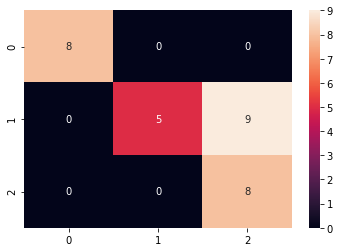

In [19]:
sns.heatmap(cm,annot=True)
plt.savefig('h.png')

[Regresar al inicio](#Contenido)